# Data Scientist Associate Practical Exam Submission


## Original Data

In [189]:
import pandas as pd
import numpy as np

filename = 'fitness_class_2212.csv'
fitness = pd.read_csv(filename)

print(fitness.head())
fitness.shape

   booking_id  months_as_member  weight  ... time  category attended
0           1                17   79.56  ...   PM  Strength        0
1           2                10   79.01  ...   AM      HIIT        0
2           3                16   74.53  ...   AM  Strength        0
3           4                 5   86.12  ...   AM   Cycling        0
4           5                15   69.29  ...   AM      HIIT        0

[5 rows x 8 columns]


(1500, 8)

The fitness data file has 1500 observations and 8 variables

## Task 1 : Data Validation
For every column in the data...
- State whether the values match the description given in the table above.
- State the number of missing values in the column.
- Describe what you did to make values match the description if they did not match.

#### Checking for Missing Values
First check which columns have any missing values.

In [190]:
fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


Among all the variables in the data set, only the 'weight' column has missing values. It is missing 20 observations.

#### Validating individual variables

#### booking_id
Description: Nominal. The unique identifier of the booking. Missing values are not possible due to the database structure.

- _Checking data type_

In [191]:
fitness['booking_id'].dtype

dtype('int64')

- _Checking if there are 1500 unique values_

In [192]:
len(fitness['booking_id'].unique())

1500

'booking_id' variable matches the description given in the table. The variable is numeric (integer data type) with no missing values and 1500 unique values.

#### months_as_member
Description: Discrete. The number of months as this fitness club member, minimum 1 month. Replace missing values with the overall average month.

- _Checking data type_

In [193]:
fitness['months_as_member'].dtype

dtype('int64')

- _Checking if all values are greater than or equal to 1_

In [194]:
(fitness['months_as_member'].values < 1).any()

False

'months_as_member' variable matches the description given in the table. The variable is numeric (integer data type) with no missing values and no values under 1

#### weight
Description: Continuous. The member's weight in kg, rounded to 2 decimal places. The minimum possible value is 40.00 kg. Replace missing values with the overall average weight.

- _Checking data type_

In [195]:
fitness['weight'].dtype

dtype('float64')

- _Checking minimum value of variable is not less than 40.00kg_

In [196]:
(fitness['weight'].values < 40).any()

False

In [197]:
min(fitness['weight'])

55.41

- _Imputing missing values_

In [198]:
from sklearn.impute import SimpleImputer
weight_imp = fitness['weight'].values.reshape(-1, 1)
imp = SimpleImputer(strategy = 'mean')
weight_imp = imp.fit_transform(weight_imp)

fitness['weight'] = weight_imp
fitness['weight'].isna().sum()

0

- _Rounding all values of column to 2 decimal places_

In [199]:
fitness = fitness.round({'weight' : 2})

'weight' variable matches the description given in the table. The variable is continuous (float data type) with values no less than 40.00. However, missing values were present. This issue was handled by imputing using the sklearn SimpleImputer with 'mean' strategy.

#### days_before
Description: Discrete. The number of days before the class the member registered, minimum 1 day.
Replace missing values with 0.

- _Checking data type_

In [200]:
fitness['days_before'].dtype

dtype('O')

Because values are of string/object type, we will convert values into a integer type. Firstly, we will check the unique values.

In [201]:
fitness['days_before'].unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

Due to data inconsistency in the values, we will strip the values into only numbers by removing any trailing characters like 'days'.

In [202]:
a = [' days', ' day']
b = ['', '']
fitness['days_before'] = fitness['days_before'].replace(a, b, regex = True)
fitness['days_before'].unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '20', '1', '15', '11', '16', '17', '29'], dtype=object)

After stripping the values, we will now change the data type into an integer.

In [203]:
fitness['days_before'] = fitness['days_before'].astype(int)

- _Checking if all values are greater than or equal to 1_

In [204]:
(fitness['days_before'].values < 1).any()

False

'days_before' variable closely matches the description given in the table but required some cleaning due to data inconsistency. To fix these inconsistencies, some observations were stripped of trailing words, specifically 'day' and 'days' and was coerced into an integer data type. There were no missing values and no values less than 1.

#### day_of_week
Description: Ordinal. The day of the week of the class. One of “Mon”, “Tue”, “Wed”, “Thu”, “Fri”, “Sat” or “Sun”. Replace missing values with “unknown”.

- _Checking data type_

In [205]:
fitness['day_of_week'].dtype

dtype('O')

- _Checking if values follow given format_

In [206]:
fitness['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

Due to data inconsistency in the values, we will strip the values into only the first three letters of the given weekdays.

In [207]:
def first_three(x):
    return x[:3]
fitness['day_of_week'] = fitness['day_of_week'].apply(first_three)
print(fitness['day_of_week'].unique())
print(fitness['day_of_week'].head())

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']
0    Wed
1    Mon
2    Sun
3    Fri
4    Thu
Name: day_of_week, dtype: object


'day_of_weel' variable closely matches the description given in the table but required some cleaning due to data inconsistency. To fix these inconsistencies, some observations were stripped of trailing characters. There were no missing values.

#### time
Description: Ordinal. The time of day of the class. Either “AM” or “PM”. Replace missing values with “unknown”.

- _Checking data type_

In [208]:
fitness['time'].dtype

dtype('O')

- _Checking unique values_

In [209]:
fitness['time'] = fitness['time'].astype('category')
fitness['time'].unique()

['PM', 'AM']
Categories (2, object): ['AM', 'PM']

'time' variable matches the description given in the table. The variable is an object/string data type with two unique values of 'AM' and 'PM' and no missing values.

#### category
Description: Nominal. The category of the fitness class. One of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”. Replace missing values with “unknown”.

- _Checking data type_

In [210]:
fitness['category'].dtype

dtype('O')

- _Checking unique values_

In [211]:
fitness['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

Originally we did not find any missing values within the 'category' variable. However, there are '-' values that do not match the given variable description. Due to this, we will consider these observations as missing values and replace them with 'unknown'.

In [212]:
fitness[fitness['category'] == '-'].shape[0]

13

There are 13 missing values of the 'category' variable.

In [213]:
fitness['category'] = fitness['category'].str.replace('-', 'unknown')
fitness['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', 'unknown', 'Aqua'],
      dtype=object)

'category' variable closely matches the description given in the table. The variable is of object/string data type with values matching the description. There were missing values presented and were imputed with 'unknown'.

#### attended
Description: Nominal. Whether the member attended the class (1) or not (0). Missing values should be removed.

- _Checking data type_

In [214]:
fitness['attended'].dtype

dtype('int64')

- _Checking unique values_

In [215]:
fitness['attended'].unique()

array([0, 1])

'attended' variable matches the description given in the table. The variable is of numerical data type with values either 0 or 1 and no missing values.

## Task 2 : Data Visualization pt. 1
Create a visualization that shows how many bookings attended the class. Use the visualization to:
- State which category of the variable attended has the most observations
- Explain whether the observations are balanced across categories of the variable attended

<AxesSubplot: xlabel='attended', ylabel='count'>

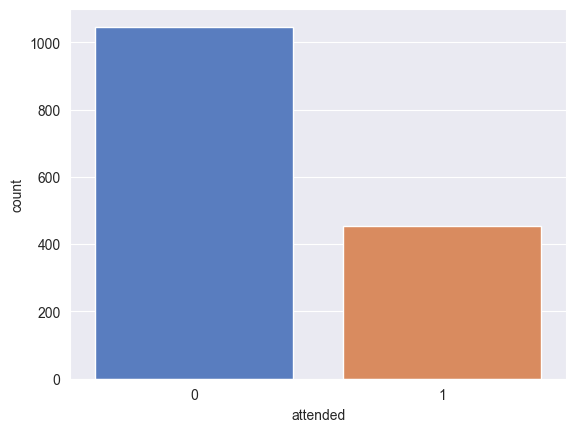

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
sns.set_style('darkgrid')
sns.countplot(x = 'attended', data = fitness)

Within the 'attended' variable, there are **more observations of 0**, meaning that there are more observations where **customers did not attend classes**.

Thus we can say that the data is **imbalanced**.

## Task 3: Data Visualization pt. 2
Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.

[Text(0.5, 1.0, 'Graph 2. Boxplot of months_as_members')]

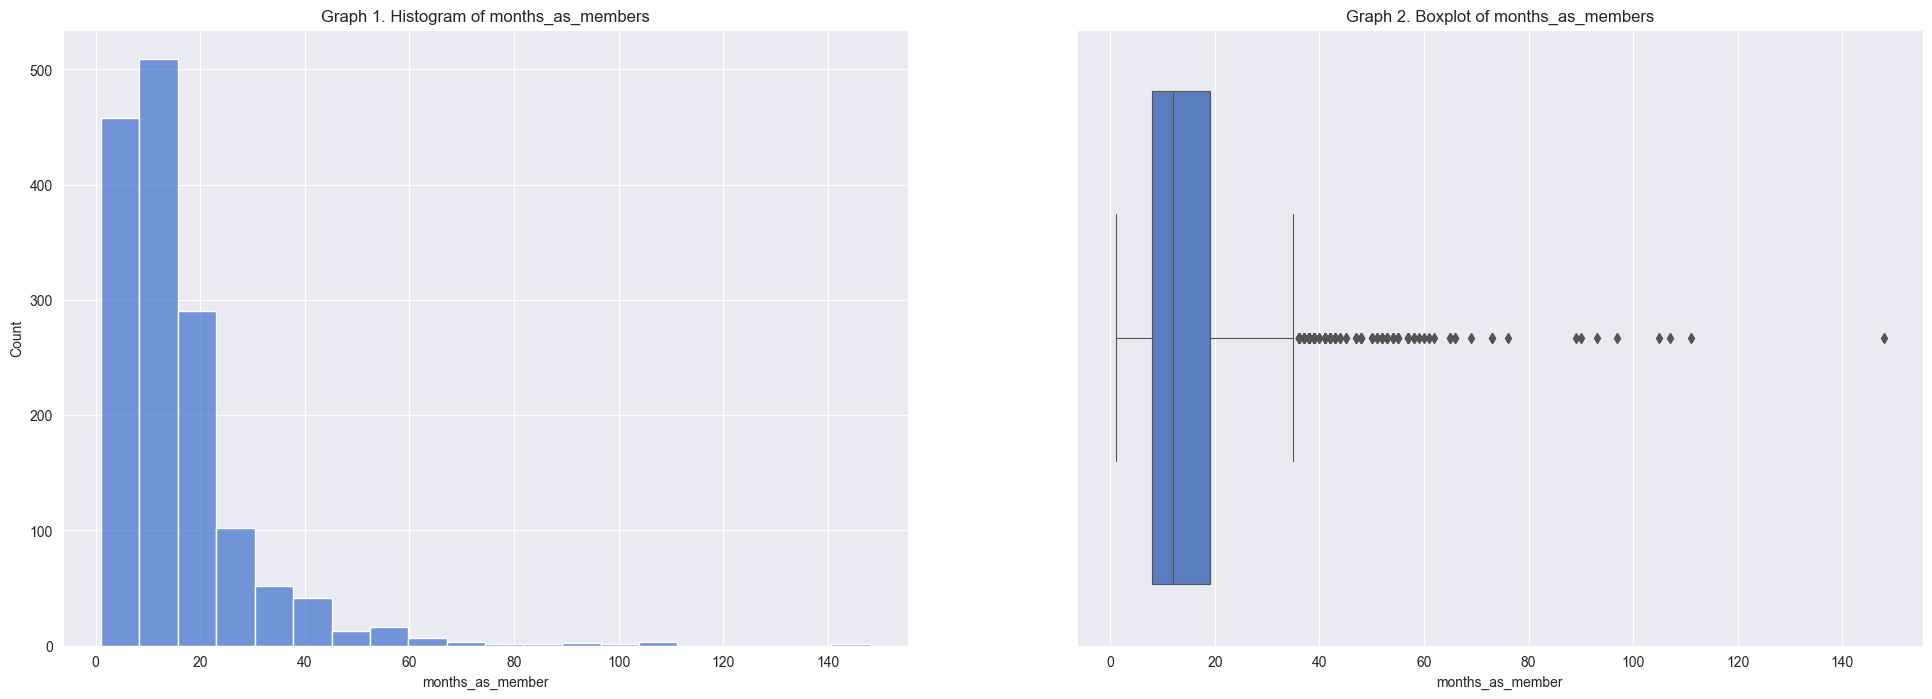

In [217]:
fig, ax = plt.subplots(1,2,figsize=(24,8))
sns.histplot(x = 'months_as_member', data = fitness, bins = 20, ax = ax[0]).set(title = 'Graph 1. Histogram of months_as_members')
sns.boxplot(x = 'months_as_member', linewidth = 0.8, ax = ax[1], data = fitness).set(title = 'Graph 2. Boxplot of months_as_members')

From the above graphs, we can see that the 'months_as_members' variable is **right-skewed**.

## Task 4 : Data Visualization pt. 3
Describe the relationship between attendance and number of months as a member. Your answer must include a visualization to demonstrate the relationship.

### Exploration of the relationship between 'months_as_member' and 'attended'

[Text(0.5, 1.0, 'Graph 3. Scatterplot of months_as_member vs. attended')]

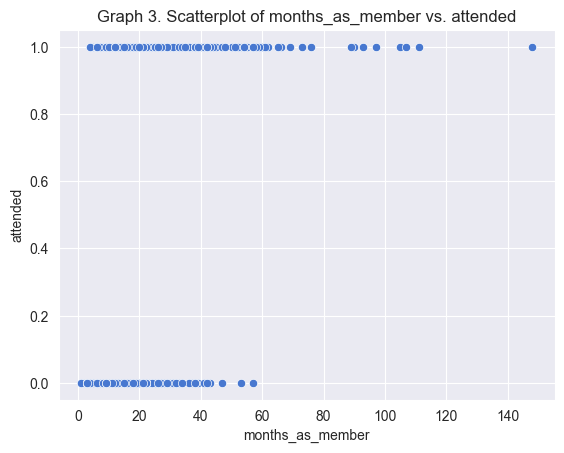

In [218]:
sns.scatterplot(x = 'months_as_member', y = 'attended', data = fitness).set(title = 'Graph 3. Scatterplot of months_as_member vs. attended')

[Text(0.5, 1.0, 'Graph 4. Boxplot of attended vs. months_as_member')]

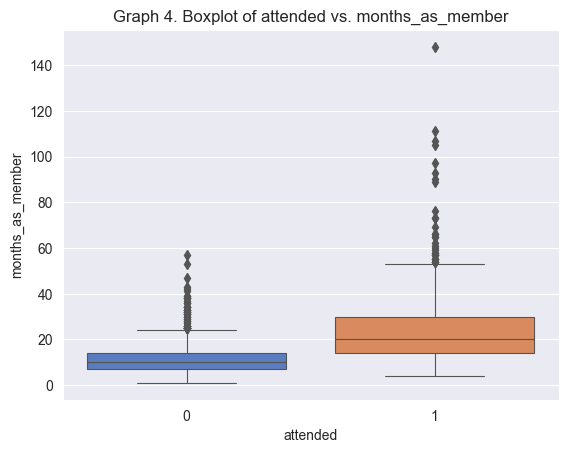

In [219]:
sns.boxplot(x = 'attended', y = 'months_as_member', linewidth = 0.8, data = fitness).set(title = 'Graph 4. Boxplot of attended vs. months_as_member')

From the above scatterplot and boxplot, we can see that **members who attended classes were members for longers than those that did not attend on average**.

### Further exploration with 'time' and 'weight' variables

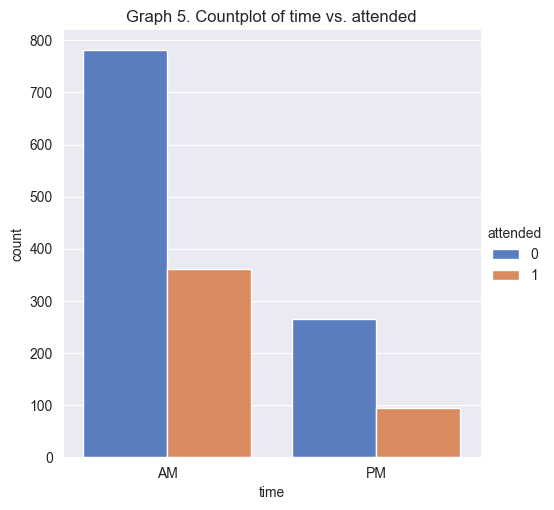

In [220]:
sns.catplot(x = 'time', hue = 'attended', kind = 'count', data = fitness).set(title = 'Graph 5. Countplot of time vs. attended')

Based on the above boxplot, we can see that there are more classes held in the AM (morning), but no strong correlation or observation can be made about the relationship of the 'time' and 'attended variable'.

[Text(0.5, 1.0, 'Graph 6. Boxplot of attended vs. weight')]

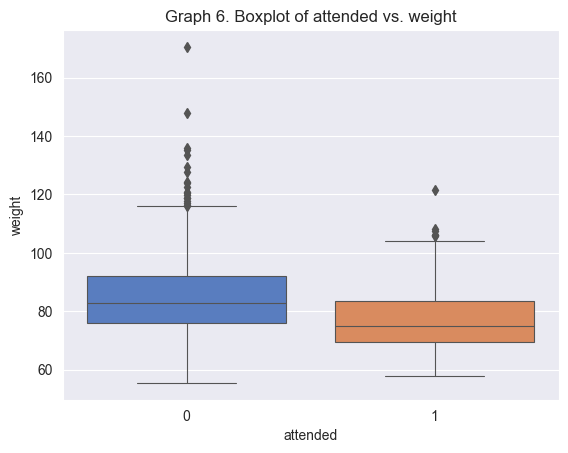

In [221]:
sns.boxplot(x = 'attended', y = 'weight', linewidth = 0.8, data = fitness).set(title = 'Graph 6. Boxplot of attended vs. weight')

Based on the above boxplot, we can observe that **members who did not attend classes had higher weight on average**.

## Task 5 : Identifying the Problem
The business wants to predict whether members will attend using the data provided. State the type of machine learning problem that this is (regression/ classification/ clustering).

The business wants to predict whether or not members will attend, which is an option between yes or no. Due to the discrete and categorical nature of our target variable, this is a binary **classification** machine learning problem.

## Task 6 : Fitting a Baseline Model
Fit a baseline model to predict whether members will attend using the data provided. You must include your code.

### Preprocessing
First, we will process the variables in preparation to be fitted into a machine learning problem. We will need to convert all string variables into integers, specifically for the 'day_of_week' and 'time' variables.

#### day_of_week

In [222]:
fitness['day_of_week'] = fitness['day_of_week'].replace(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                                                        [1, 2, 3, 4, 5, 6, 7])
print(fitness['day_of_week'].head())

0    3
1    1
2    7
3    5
4    4
Name: day_of_week, dtype: int64


#### time

In [223]:
fitness['time'] = fitness['time'].replace(['AM', 'PM'], [0, 1])
fitness['time'].head()

0    1
1    0
2    0
3    0
4    0
Name: time, dtype: category
Categories (2, int64): [0, 1]

#### category
We will create dummy variables for 'category'

In [224]:
cat_dummies = pd.get_dummies(fitness['category'], drop_first = True)
cat_dummies.head()

Cycling  HIIT  Strength  Yoga  unknown
0        0     0         1     0        0
1        0     1         0     0        0
2        0     0         1     0        0
3        1     0         0     0        0
4        0     1         0     0        0

#### attended
We will create a new target variable called 'not_attended' that flips the attended values for easier evaluation

In [225]:
fitness['not_attended'] = fitness['attended'].replace([1, 0], [0, 1])
fitness.loc[:, ['attended', 'not_attended']].sample(8)

attended  not_attended
968          1             0
909          1             0
321          0             1
1233         0             1
712          0             1
716          0             1
334          1             0
1243         0             1

### Fitting a Model
We will use the K-Nearest Neighbors (KNN) as a baseline model

#### Splitting data into training and testing data sets

In [226]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = pd.concat([fitness.iloc[:, :6], cat_dummies], axis = 1).drop('booking_id', axis = 1)
y = fitness.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18, stratify = y)
print(X.head())

   months_as_member  weight  days_before  ...  Strength Yoga  unknown
0                17   79.56            8  ...         1    0        0
1                10   79.01            2  ...         0    0        0
2                16   74.53           14  ...         1    0        0
3                 5   86.12           10  ...         0    0        0
4                15   69.29            8  ...         0    0        0

[5 rows x 10 columns]


#### Finding optimal value of n_neighbors hyperparameter

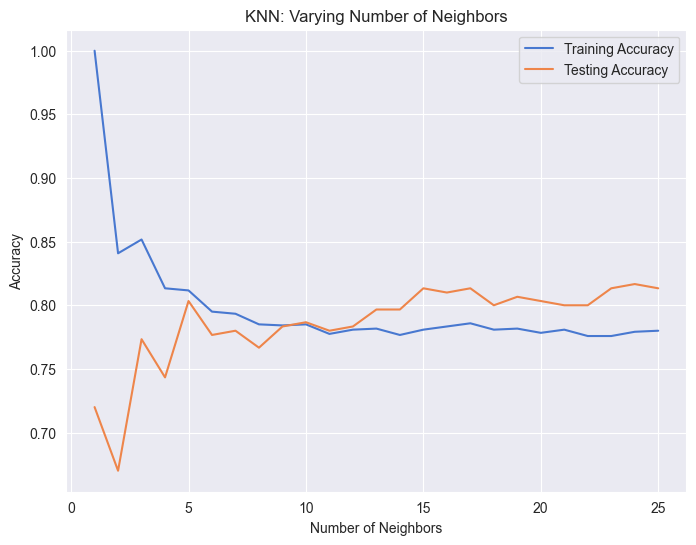

In [227]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

#### Fitting model with optimal value of n_neighbors hyperparameter
Based on the above graph, the best value of n_neighbors that optimizes both training and testing accuracies is **5**.

In [228]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [229]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Accuracy: {}".format(accuracy_score(y_test, knn_pred)))
print("Precision: {}".format(precision_score(y_test, knn_pred)))
print("Recall: {}".format(recall_score(y_test, knn_pred)))
print("F1: {}".format(f1_score(y_test, knn_pred)))

Accuracy: 0.8033333333333333
Precision: 0.8348214285714286
Recall: 0.8947368421052632
F1: 0.8637413394919169


#### Creating a KNN model with scaled features

In [230]:
X.describe()

months_as_member       weight  ...         Yoga      unknown
count       1500.000000  1500.000000  ...  1500.000000  1500.000000
mean          15.628667    82.610373  ...     0.090000     0.008667
std           12.926543    12.680411  ...     0.286277     0.092722
min            1.000000    55.410000  ...     0.000000     0.000000
25%            8.000000    73.562500  ...     0.000000     0.000000
50%           12.000000    81.035000  ...     0.000000     0.000000
75%           19.000000    89.382500  ...     0.000000     0.000000
max          148.000000   170.520000  ...     1.000000     1.000000

[8 rows x 9 columns]

Above we can see the range of the individual features. Because KNN is influenced by distance, features with larger ranges could have a larger influence on the predictions. Thus, we will try to scale the features to see what effect it will have in the performance of our model.

In [231]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### Finding optimal value for n_neighbors for scaled features

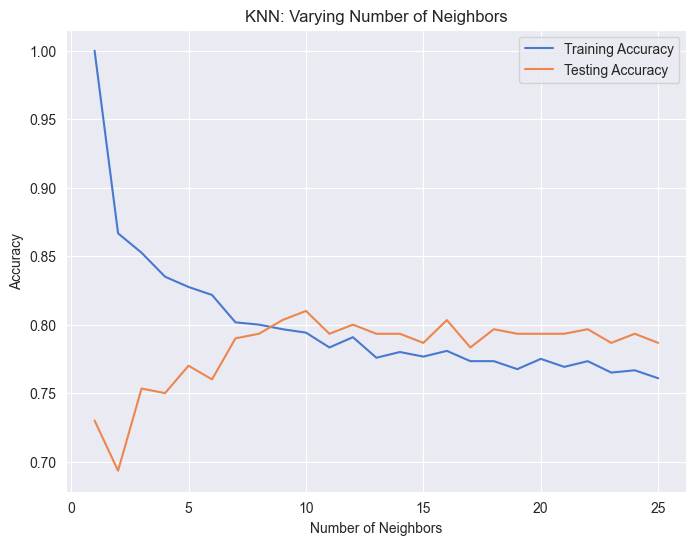

In [232]:
train_accuracies_scaled = {}
test_accuracies_scaled = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train_scaled, y_train)
    train_accuracies[neighbor] = knn.score(X_train_scaled, y_train)
    test_accuracies[neighbor] = knn.score(X_test_scaled, y_test)
    
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

Based on the above graph, the optimal value for n_neighbors is **7**.

In [233]:
knn_scaled = KNeighborsClassifier(n_neighbors = 7)
knn_scaled.fit(X_train_scaled, y_train)
knn_scaled_pred = knn_scaled.predict(X_test_scaled)

In [234]:
print("Accuracy: {}".format(accuracy_score(y_test, knn_scaled_pred)))
print("Precision: {}".format(precision_score(y_test, knn_scaled_pred)))
print("Recall: {}".format(recall_score(y_test, knn_scaled_pred)))
print("F1: {}".format(f1_score(y_test, knn_scaled_pred)))

Accuracy: 0.79
Precision: 0.811965811965812
Recall: 0.9090909090909091
F1: 0.8577878103837473


## Task 7
Fit a comparison model to predict whether members will attend using the data provided. You must include your code.

### Logistic Regression

In [235]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

In [236]:
print("Accuracy: {}".format(accuracy_score(y_test, logreg_pred)))
print("Precision: {}".format(precision_score(y_test, logreg_pred)))
print("Recall: {}".format(recall_score(y_test, logreg_pred)))
print("F1: {}".format(f1_score(y_test, logreg_pred)))

Accuracy: 0.79
Precision: 0.8067226890756303
Recall: 0.9186602870813397
F1: 0.8590604026845637


### Logistic Regression with Scaled Features

In [237]:
logreg_scaled = LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train)
logreg_scaled_pred = logreg_scaled.predict(X_test_scaled)

In [238]:
print("Accuracy: {}".format(accuracy_score(y_test, logreg_scaled_pred)))
print("Precision: {}".format(precision_score(y_test, logreg_scaled_pred)))
print("Recall: {}".format(recall_score(y_test, logreg_scaled_pred)))
print("F1: {}".format(f1_score(y_test, logreg_scaled_pred)))

Accuracy: 0.7866666666666666
Precision: 0.803347280334728
Recall: 0.9186602870813397
F1: 0.8571428571428572


### Gradient Boosting Classifier

#### Finding best hyperparameters using GridSearchCV

In [239]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

params_gbt = {
    'n_estimators' : [300, 400, 500],
    'max_depth' : np.arange(1, 12, 1),
    'min_samples_leaf': [0.1, 0.2],
    'max_features': ['log2', 'sqrt']
}

grid_gbt = GridSearchCV(GradientBoostingClassifier(random_state = 88),
                        param_grid = params_gbt,
                       cv = 5,
                       n_jobs = 1)

grid_gbt.fit(X_train, y_train)
grid_gbt.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 0.2,
 'n_estimators': 400}

#### Fitting the model with the best hyperparameters

In [251]:
gbt = GradientBoostingClassifier(n_estimators = 400,
                                 max_depth = 2,
                                 min_samples_leaf = 0.2,
                                 max_features = 'log2',
                                 random_state = 88)
gbt.fit(X_train, y_train)
gbt_pred = gbt.predict(X_test)

In [252]:
print("Accuracy: {}".format(accuracy_score(y_test, gbt_pred)))
print("Precision: {}".format(precision_score(y_test, gbt_pred)))
print("Recall: {}".format(recall_score(y_test, gbt_pred)))
print("F1: {}".format(f1_score(y_test, gbt_pred)))

Accuracy: 0.78
Precision: 0.8235294117647058
Recall: 0.8708133971291866
F1: 0.8465116279069766


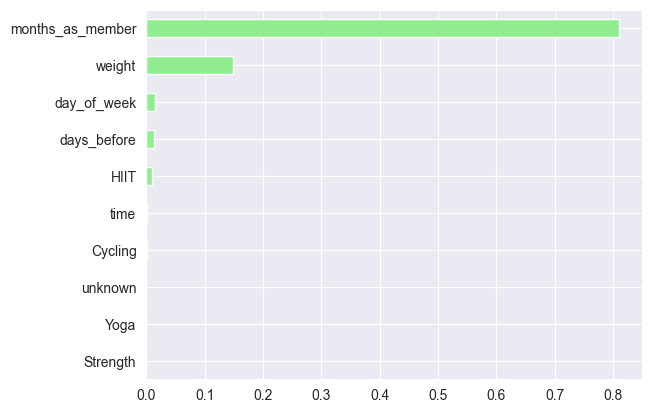

In [242]:
importances_gbt = pd.Series(gbt.feature_importances_, index = X.columns)
sorted_importances_gbt = importances_gbt.sort_values()
sorted_importances_gbt.plot(kind='barh', color='lightgreen')
plt.show()

### Gradient Boosting Classifier with Scaled Features

#### Finding best hyperparameters using GridSearchCV

In [243]:
grid_gbt.fit(X_train_scaled, y_train)
grid_gbt.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 0.2,
 'n_estimators': 400}

#### Fitting the model with the best hyperparameters

In [249]:
gbt_scaled = GradientBoostingClassifier(n_estimators = 400,
                                 max_depth = 2,
                                 min_samples_leaf = 0.2,
                                 max_features = 'log2',
                                 random_state = 88)
gbt_scaled.fit(X_train_scaled, y_train)
gbt_scaled_pred = gbt_scaled.predict(X_test_scaled)

In [250]:
print("Accuracy: {}".format(accuracy_score(y_test, gbt_scaled_pred)))
print("Precision: {}".format(precision_score(y_test, gbt_scaled_pred)))
print("Recall: {}".format(recall_score(y_test, gbt_scaled_pred)))
print("F1: {}".format(f1_score(y_test, gbt_scaled_pred)))

Accuracy: 0.7733333333333333
Precision: 0.821917808219178
Recall: 0.861244019138756
F1: 0.8411214953271028


## Task 8 : Model Selection
Explain why you chose the two models used in parts 6 and 7.

#### K-Nearest Neighbors (KNN)
I chose to use the KNN Model because of it's simplicity. The KNN model works best with smaller and properly labelled data. Because our data set only has 1500 observations and target variable with 0 or 1 values, KNN would be a good baseline model for the project.

#### Logistic Regression
Secondly, I chose the Logistic Regression model because as opposed to KNN that derives its predictions from Euclidian Distance, Logistic Regression can offer a more interpretable result that is also efficient.

#### Gradient Boosting Classifier
Lastly, I chose to use the Gradient Boosting Classifier, which is an boosting ensemble method. From previous data exploration, it seemed that there only few (1-2) strong predictors within the data set, while others can be said to be _weak learners_. This is mostly due to the presence of the dummy variables created from the original 'category' variable. Boosting techniques combine these weak learners into a strong learner. Thus, I chose the Gradient Boosting Classifier to help support the less accurate predictors.

## Task 9 : Model Performance
Compare the performance of the two models used in parts 6 and 7, using any method suitable. You must include your code.

In the above parts, I have chosen to create more than 2 models in order to have more options and in hopes of getting a better accuracy/performance. In the Task 7 section, I have shown the accuracy, precision, recall and F1 scores for all the models created. Below, I will show once again the best performance of each model chosen between the scaled and unscaled versions.

### K-Nearest Neighbors with Original Features

In [246]:
print("Accuracy: {}".format(accuracy_score(y_test, knn_pred)))
print("Precision: {}".format(precision_score(y_test, knn_pred)))
print("Recall: {}".format(recall_score(y_test, knn_pred)))
print("F1: {}".format(f1_score(y_test, knn_pred)))

Accuracy: 0.8033333333333333
Precision: 0.8348214285714286
Recall: 0.8947368421052632
F1: 0.8637413394919169


### Logistic Regression with Original Features

In [247]:
print("Accuracy: {}".format(accuracy_score(y_test, logreg_pred)))
print("Precision: {}".format(precision_score(y_test, logreg_pred)))
print("Recall: {}".format(recall_score(y_test, logreg_pred)))
print("F1: {}".format(f1_score(y_test, logreg_pred)))

Accuracy: 0.79
Precision: 0.8067226890756303
Recall: 0.9186602870813397
F1: 0.8590604026845637


### Gradient Boosting Classifier with Original Features

In [253]:
print("Accuracy: {}".format(accuracy_score(y_test, gbt_pred)))
print("Precision: {}".format(precision_score(y_test, gbt_pred)))
print("Recall: {}".format(recall_score(y_test, gbt_pred)))
print("F1: {}".format(f1_score(y_test, gbt_pred)))

Accuracy: 0.78
Precision: 0.8235294117647058
Recall: 0.8708133971291866
F1: 0.8465116279069766


## Task 10 : Final Model Evaluation and Selection
Explain which model performs better and why.

### Explanation of performance metrics

Due to the imbalanced nature of the target variable 'attended', the model cannot be evaluated solely on the overall accuracy. Thus, we have to look further into the precision, recall and F1 scores.

**Precision** measures how many of the positive predictions the model correctly predicted. In other words, when the model predicts a positive value, what percent of the time is the model correct? A lower precision value indicates that the model has a high rate of predicting false positives.

**Recall** measures how many positive cases the model correctly predicted. In other words, how many actual positive cases did the model predict? A lower recall value indicates that the model has a higher rate of predicting false negatives.

![1_3yGLac6F4mTENnj5dBNvNQ](1_3yGLac6F4mTENnj5dBNvNQ.jpeg)

Source: https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5

### Overall Accuracy

Overall, the **KNN Model** has the best accuracy among the 3 final models with an accuracy score of **0.803**.
**Logistic Regression** has the second highest accuracy with a score of **0.79**.
While **Gradient Boosting Classifier** comes last with an accuracy of **0.78**.
All these accuracy scores are quite similar as they all fall in the 78% to 81% range.
However, as stated earlier, this cannot be the only metric that we make a final decision upon.

### The case of GoalZone

GoalZone aims to predict whether a member will attend a class or not in order to open more spaces for their workout classes. If a member is predicted to not attend the class, GoalZone can open more spaces to maximize their class capacity.

The best model should be chosen based on the priority of the business. If GoalZone's biggest priority is to make as much space as possible in the class, then the best model is the one with the highest recall score. Thus, the best model would be the **Logistic Regression** model, which has a recall score of **0.9186**. This means that the Logistic Regression model is able to predict 91.86% of cases where the member does not attend the class. However, the Logistic Regression model has a lower precision score compared to the KNN model, which means it is slightly more prone to predicting false positives. This makes it more likely that GoalZone could make a space available in a class when it is actually full.

If GoalZone's mission is just to open some more availability in a class and ensuring that a class is not overfilled, the best model would be that with the highest precision. Thus, the best model will be the **KNN** model, which has a precision of **0.835**. This means that when the KNN model predicts a member will not attend the class, it is correct 83.5% of the time. However, the KNN model has a lower recall score comapred to the Logistic Regression model, which means it is more prone to predict a false negative. This means the model is more likely to predict that a member will attend when they are not, thus not maximizing the space in the class.

### Conclusion
The KNN model had the highest accuracy among the models. However, due to the imbalanced nature of the target variable in the data set, we cannot base our decision solely on the precision and recall. Overall, based on the main priority of GoalZone, they can choose either the KNN or Logistic Regression model.

Personally, **I would recommend the KNN model** over the Logistic Regression model in order to balance the comfort of members during workout classes with adding availabilities in classes.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam